In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

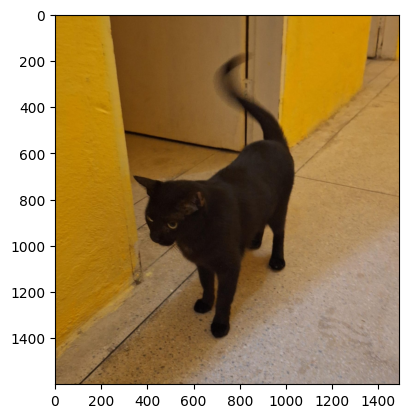

In [3]:
img = cv2.imread("pretuda.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

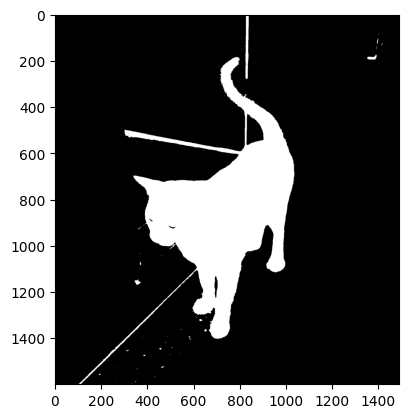

In [24]:
r, g, b = cv2.split(img)

_, th = cv2.threshold(r, 90, 25, 1)

plt.imshow(th, cmap="gray")

In [29]:
kernel = np.array([
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
]).astype(np.uint8)

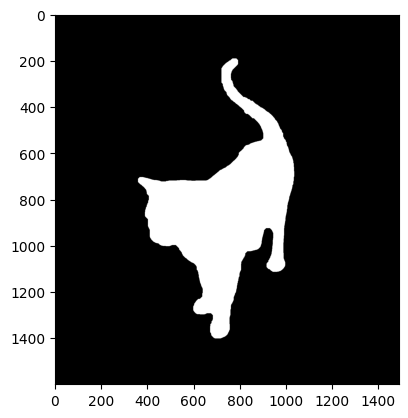

In [60]:
th2 = cv2.erode(th, kernel, iterations=7)
th2 = cv2.dilate(th2, kernel, iterations=7)

th2 = cv2.dilate(th2, kernel, iterations=8)
th2 = cv2.erode(th2, kernel, iterations=8)


plt.imshow(th2, cmap="gray")

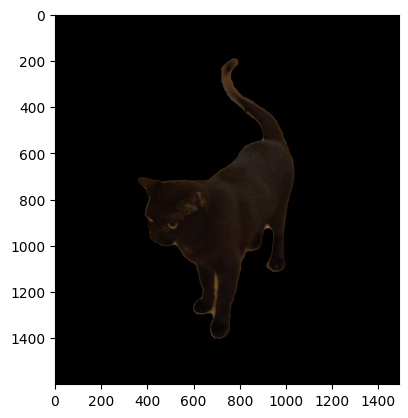

In [61]:
img_2 = deepcopy(img)
img_2[:, :, 0] = img_2[:, :, 0] * (th2 > 0).astype(np.uint8)
img_2[:, :, 1] = img_2[:, :, 1] * (th2 > 0).astype(np.uint8)
img_2[:, :, 2] = img_2[:, :, 2] * (th2 > 0).astype(np.uint8)

plt.imshow(img_2)